## Interpolação polinomial.

Dado que você um conjunto de pontos n no espaço cartesiano, é possível construir um polinômio interpolador de grau n-1 que passe pelos n.pontos.

$(x_1, y_1) \\  (x_2, y_2) \\ (x_3, y_3) \\ \vdots \\ (x_n, y_n)$


Um polinomio pode ser dado por: 

$$ p(x) = \sum_{i=0}^{n} a_{i}x^{i}$$

#### De modo que posso formar as matrizes:

\begin{equation}
\begin{pmatrix}
  1       & x_1    & x_1^{2}  & \ldots & x_1^{n} \\ \\
  1       & x_2    & x_2^{2}  & \ldots  & x_2^{n} \\  \\ 
  1       & x_3    & x_3^{2}  & \ldots &  x_3^{n} \\  \\ 
  \vdots  & \vdots & \vdots   & \ldots & \vdots  \\ \\
  1       & x_n    & x_n^{2}  & \ldots & x_n^{n}
\end{pmatrix}
= X
\end{equation}




\begin{equation}
\begin{pmatrix}
  a_0  \\ 
  a_1   \\  
  a_2   \\ 
  \vdots \\
  a_n
\end{pmatrix}
= A
\end{equation}




\begin{equation}
\begin{pmatrix}
  p(x_0)  \\ 
  p(x_1)   \\  
  p(x_2)   \\ 
  \vdots \\
  p(x_{n-1})
\end{pmatrix}
= P
\end{equation}


### Então ...

\begin{equation}
\begin{pmatrix}
  1       & x_1    & x_1^{2}  & \ldots & x_1^{n} \\ \\
  1       & x_2    & x_2^{2}  & \ldots  & x_2^{n} \\  \\ 
  1       & x_3    & x_3^{2}  & \ldots &  x_3^{n} \\  \\ 
  \vdots  & \vdots & \vdots   & \ldots & \vdots  \\ \\
  1       & x_n    & x_n^{2}  & \ldots & x_n^{n}
\end{pmatrix}
\begin{pmatrix}
  a_0  \\ 
  a_1   \\  
  a_2   \\ 
  \vdots \\
  a_n
\end{pmatrix}
=
 \begin{pmatrix}
  p(x_0)  \\ 
  p(x_1)   \\  
  p(x_2)   \\ 
  \vdots \\
  p(x_{n})
\end{pmatrix}
\end{equation}

$$ X A = P$$


### O que queremos mesmo? 
Aah sim, os coeficientes.
Sabendo os coeficientes, nós temos de fato a função polinomial desejada!

$$X^{-1} X A = X^{-1}P $$
$$ I A = X^{-1}P $$
$$  A = X^{-1}P $$

## Exemplo

Encontremos o polinômio interpolador que passe pelos pontos > 

$(x_1,y_1) = (1,3) \\ (x_2,y_2) = (2-2) \\ (x_3,y_3) = (3,-5) \\ (x_4,y_4) =(4,0)  $

In [17]:
### code:  
import numpy as np
from scipy import linalg

## definindo os arrays:

X = np.array([[1, 1**1 , 1**2 , 1**3 ],
              [1, 2**1 , 2**2 , 2**3],
              [1, 3**1 , 3**2 , 3**3],
              [1, 4**1 , 4**2 , 4**3]])

P = np.array([[3],
              [-2],
              [-5],
              [0]])

X_inv = linalg.inv(X)

## A = Xinv P
A = X_inv @ P

def func(A, x):
    a_0 = A[0][0]
    a_1 = A[1][0]
    a_2 = A[2][0]
    a_3 = A[3][0]

    f_x = a_0 + a_1* x + a_2* x**2 + a_3* x**3
    return f_x

## definindo um conjunto de pontos

x = np.linspace(-1.5, 5, 300)
y = func(A=A , x=x)




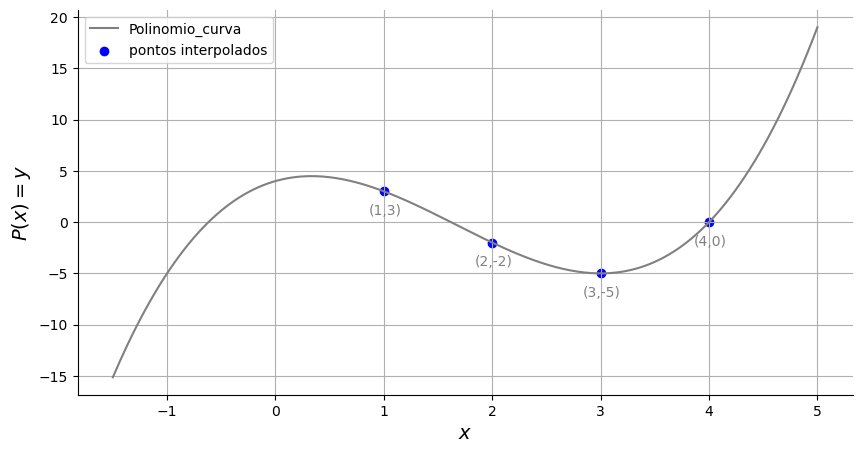

In [39]:
import matplotlib.pyplot as plt

X_points = np.array([1,2,3,4])
Y_points = np.array([3,-2 , -5, 0])

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(x, y, color='gray', label = 'Polinomio_curva')
# Retirando as bordas
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(True)
ax.set_ylabel('$P(x)=y$', fontsize=14, color = 'black')
ax.set_xlabel('$x$', fontsize=14, color = 'black')

# Colocando bolinhas nos últimos 5 marcadores
ax.scatter(X_points, Y_points, color='blue', alpha=1.0, label = 'pontos interpolados')

ax.legend(loc='upper left')

## anotando os pontos 

for i in range(len(X_points)):
    text = f'({X_points[i]},{Y_points[i]})'

    ax.annotate(text ,(X_points[i] , Y_points[i]),
                xytext = (+1, -17) , textcoords = 'offset points' , color= 'gray',
                ha = 'center')
    
plt.savefig('Polinomio_pic.jpeg', dpi = 600)
plt.show()
